# 본 내용은 인프런의 강의명(딥러닝 CNN 완벽 가이드 - Fundamental 편)를 듣고 요약했습니다.
+ 이미지 및 코드를 함부로 사용하지 마세요

1. 편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것.
2. 분산(variance)는 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 수로 나눠서 구한다. 즉, 평균에서 관측값들의 분포를 나타낸다. 분산 값이 클 수록 분포가 넓게 되어있다.
3. 표준편차(Standarad deviation)은 분산갑세서 제곱근한 것이다. 분산의 값이 너무 크기 때문에 줄여준다. 표준편차가 작을수록 평균에 가깝고 클수록 평균에서 관측값의 분포가 멀다.

### 평균이 1이고 표준편차가 1인 표준 정규분포에서 난수 추출
+ 표준 편차가 클수록 개별 값의 크기가 일반적으로 커짐.

In [2]:
# noraml은 정규 분포
# uniform은 균등 분포
# loc는 location의 약자, 위치가 어디 존재하는지 확인(평균 위치)
# scale은 표준편차
import numpy as np

numbers = np.random.normal(loc=0.0, scale=0.01, size=(100, 100))
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

0.0001421472469341551
0.010051189778998562
1.421472469341551


## Xacier Glorot Initialization
+ 입력 노드와 출력 노드의 개수를 감안하여 동적으로 Weight 초기화 수행

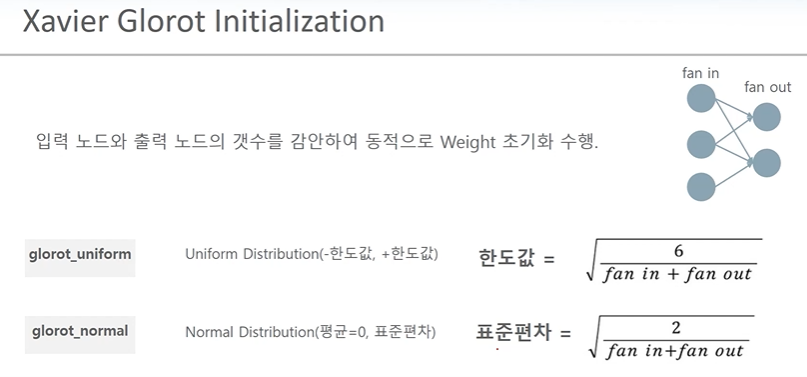

### Xacier initializatinon - 정규뷴포(glorot_normal), 균일분포(glorot_unifor)
- sigmoid, hyperbolic에 최적화된 가중치 초기화

In [7]:
# glorot_normal
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)

# size=(100,100) # 100행, 100열
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print('weights shape:', weights.shape)
print(weights)
print('weights mean:', weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.3333333333333333
weights shape: (100, 100)
[[ 0.58790463 -0.20006124  0.30217477 ... -0.32920364 -0.48814232
   0.20904493]
 [-0.20823584  0.48398863 -0.15935864 ... -0.16080049 -0.02843036
  -0.005476  ]
 [ 0.20603651  0.41632889 -0.52040009 ...  0.25141025  0.38496939
  -0.64566506]
 ...
 [-0.56520867 -0.29826987 -0.13054756 ...  0.14938163 -0.03917759
  -0.35815554]
 [ 0.25060839  0.50407461  0.05888425 ... -0.09212638 -0.34818787
  -0.29933973]
 [ 0.42726594 -0.2404195   0.00257299 ... -0.00462966 -0.16855649
  -0.18847106]]
weights mean: 0.0020317127116349087 std: 0.33624310695500825 sum: 20.317127116349088


In [12]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)

# size=(100,100) # 100행, 100열
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print('weights shape:', weights.shape)
print(weights)
print('weights mean:', weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
weights shape: (100, 100)
[[ 0.04527344  0.31916442  0.35960604 ...  0.45729975 -0.32093014
  -0.29748178]
 [ 0.08330879  0.42049309 -0.35262109 ... -0.30485876 -0.34721019
   0.10464228]
 [-0.10384245  0.11780765 -0.37152532 ... -0.41994684  0.42246362
  -0.3028671 ]
 ...
 [-0.51064284  0.21551822 -0.47314983 ...  0.0817349  -0.26626635
  -0.16134543]
 [ 0.56865246 -0.08246246  0.46293997 ...  0.14102836  0.31259903
   0.40876084]
 [ 0.37762651 -0.39120887  0.23708912 ...  0.07314228 -0.0751056
  -0.52857813]]
weights mean: 0.0036812639994994677 std: 0.33275244479114163 sum: 36.812639994994676


### He Initialization
- Relu에 보다 최적화된 가중치 초기화

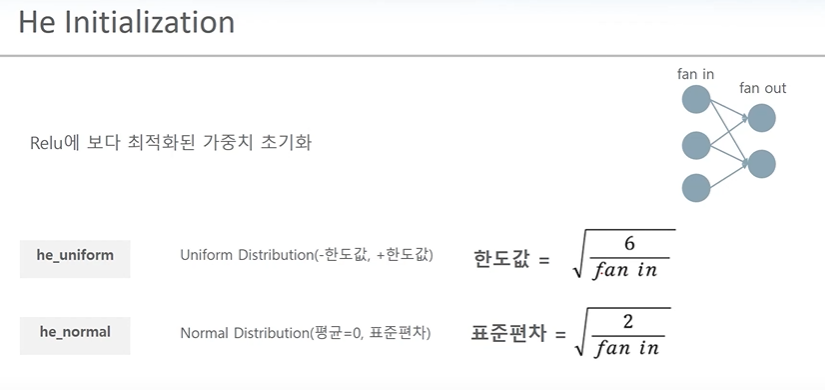

In [8]:
# he_normal
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:', weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 0.12237154  0.28061324 -0.02911185 ... -0.48639696 -0.05454705
   0.35889428]
 [-0.58556624 -0.19251862  0.39331828 ... -0.0566449   0.15801777
  -0.55690143]
 [-0.54405525  0.30599793  1.17249574 ... -0.82036966  0.51402793
   0.58877354]
 ...
 [ 0.13154525  0.87771111  0.79015812 ...  0.07331842 -0.12491528
   1.11312777]
 [ 0.25919046  0.69978784  0.13633041 ...  0.3067077   0.15198807
  -0.39540057]
 [-0.21045096 -0.96916545  0.26595187 ...  0.45180383  0.25434246
  -0.26588392]]
weights mean: -0.0024178735229949374 std: 0.4518918625407034 sum: -24.178735229949375


In [11]:
# he_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:', weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[-0.57718859  0.16776395  0.13150189 ... -0.13595769 -0.15367847
  -0.49710448]
 [ 0.09579196  0.6130408   0.51687883 ... -0.40898619  0.49242854
  -0.27751472]
 [ 0.19397161  0.48427257 -0.07428063 ...  0.30511269  0.59720521
  -0.68022025]
 ...
 [ 0.39368723  0.45638142  0.64435305 ... -0.10217901 -0.09733069
  -0.55423587]
 [ 0.55082861 -0.52515423 -0.00141728 ...  0.75861858  0.18866373
  -0.45931371]
 [ 0.19412621 -0.41528069  0.17612476 ...  0.68415174  0.00860277
  -0.38247989]]
weights mean: 0.0012881264852036625 std: 0.4462443822037799 sum: 12.881264852036626


### weight 초기화를 He Normal로 변경 후 성능 검증
- CNN의 weight default(초기화)는 glorot_uniform이며, 이를 he_normal로 변경 후 동일 모델로 성능 테스트
- label은 원-핫 인코딩을 적용


In [13]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

### CIFAR10 데이터 재수집

In [14]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [15]:
# one hot encoding 작업
label = to_categorical(train_labels)

In [20]:
# class가 총 10개
print('train_labels shape:', train_labels.shape, ', label shape:', label.shape)

train_labels shape: (50000, 1) , label shape: (50000, 10)


In [21]:
train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [23]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

IMAGE_SIZE = 32
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) # batch_size를 제외한 3차원

# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
              
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)
                 
# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units 개수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)
 
model = Model(inputs=input_tensor, outputs=output)
                 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [24]:
# label 값이 원-핫 인코딩으로 loss는 categorical_crossentropy 사용
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 25s 30ms/step - loss: 1.8935 - accuracy: 0.3059 - val_loss: 1.3398 - val_accuracy: 0.5172
Epoch 2/30
665/665 [==============================] - 19s 29ms/step - loss: 1.2795 - accuracy: 0.5418 - val_loss: 1.0347 - val_accuracy: 0.6392
Epoch 3/30
665/665 [==============================] - 19s 29ms/step - loss: 1.0239 - accuracy: 0.6361 - val_loss: 0.9131 - val_accuracy: 0.6799
Epoch 4/30
665/665 [==============================] - 19s 29ms/step - loss: 0.8668 - accuracy: 0.6976 - val_loss: 0.8427 - val_accuracy: 0.7068
Epoch 5/30
665/665 [==============================] - 19s 29ms/step - loss: 0.7741 - accuracy: 0.7270 - val_loss: 0.7927 - val_accuracy: 0.7297
Epoch 6/30
665/665 [==============================] - 19s 29ms/step - loss: 0.6943 - accuracy: 0.7495 - val_loss: 0.7309 - val_accuracy: 0.7468
Epoch 7/30
665/665 [==============================] - 19s 29ms/step - loss: 0.6393 - accuracy: 0.7720 - val_loss: 0.6989 - val_accuracy:

313/313 [==============================] - 4s 13ms/step - loss: 0.8052 - accuracy: 0.7718


[0.8051531910896301, 0.7717999815940857]

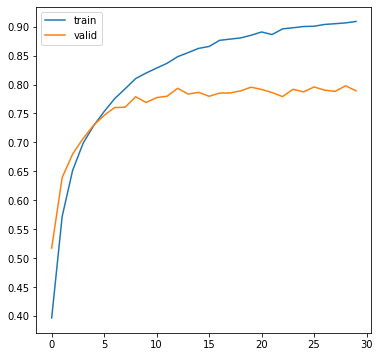

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)


# 테스트 데이터로 성능평가
model.evaluate(test_images, test_oh_labels)

Batch Normalization을 모델에 적용하면 he normal을 적용하나 glorot uniform을 적용하나 별 차이가 없다.